# H1: Биполярное расстройство порождает больше твитов (интернет-активность)
# H0: Биполярное расстройство не влияет на кол-во твитов

Корреляция Пирсона: 0.009682264626397786
p-value: 0.8796598756969942


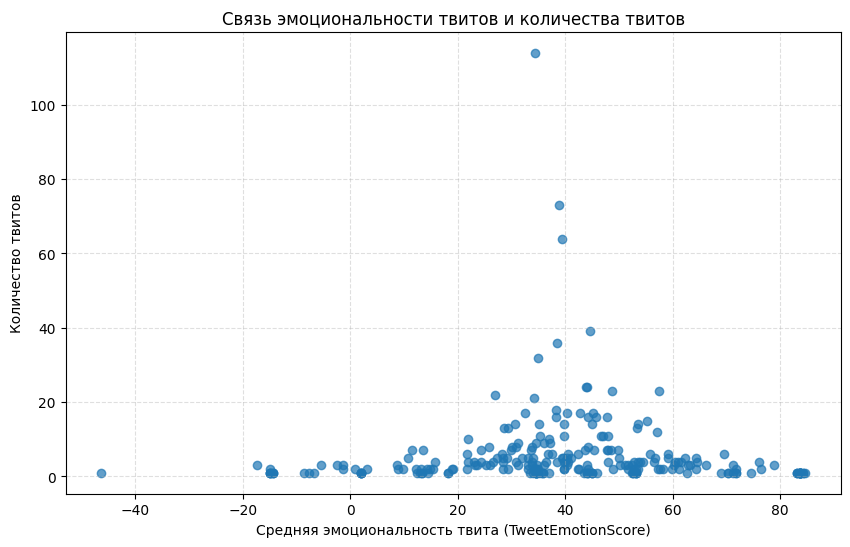

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
df = pd.read_csv("tweets_with_scores (2).csv")
df["year_month"] = df["date"].astype(str).str.slice(0,7)
#средняя эмоциональность твитов в каждом месяце
emo_monthly = df.groupby("year_month")["TweetEmotionScore"].mean().reset_index()
emo_monthly.columns = ["year_month", "mean_tweet_emo"]
# Считаем количество твитов по месяцам
count_monthly = df.groupby("year_month")["tweet_id"].count().reset_index()
count_monthly.columns = ["year_month", "tweet_count"]
# мердж
merged = emo_monthly.merge(count_monthly, on="year_month")
# Корреляция
r, p = pearsonr(merged["mean_tweet_emo"], merged["tweet_count"])
print("Корреляция Пирсона:", r)
print("p-value:", p)
plt.figure(figsize=(10,6))
plt.scatter(merged["mean_tweet_emo"], merged["tweet_count"], alpha=0.7)
plt.xlabel("Средняя эмоциональность твита (TweetEmotionScore)")
plt.ylabel("Количество твитов")
plt.title("Связь эмоциональности твитов и количества твитов")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

Корреляционный анализ показал отсутствие статистически значимой связи между средней эмоциональностью твитов и количеством твитов (p > 0.05). Следовательно, на основе рассматриваемых данных нельзя сделать вывод о том, что биполярное расстройство приводит к увеличению интернет-активности.
